In [5]:
import pandas as pd

# Load the CICIDS2017 dataset
df = pd.read_csv('dataset.csv')

# View the first few rows
print(df.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42158 entries, 0 to 42157
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             42158 non-null  int64  
 1    Flow Duration                42158 non-null  int64  
 2    Total Fwd Packets            42158 non-null  int64  
 3    Total Backward Packets       42158 non-null  int64  
 4   Total Length of Fwd Packets   42158 non-null  int64  
 5    Total Length of Bwd Packets  42158 non-null  int64  
 6    Fwd Packet Length Max        42158 non-null  int64  
 7    Fwd Packet Length Min        42158 non-null  int64  
 8    Fwd Packet Length Mean       42158 non-null  float64
 9    Fwd Packet Length Std        42158 non-null  float64
 10  Bwd Packet Length Max         42158 non-null  int64  
 11   Bwd Packet Length Min        42158 non-null  int64  
 12   Bwd Packet Length Mean       42158 non-null  float64
 13   

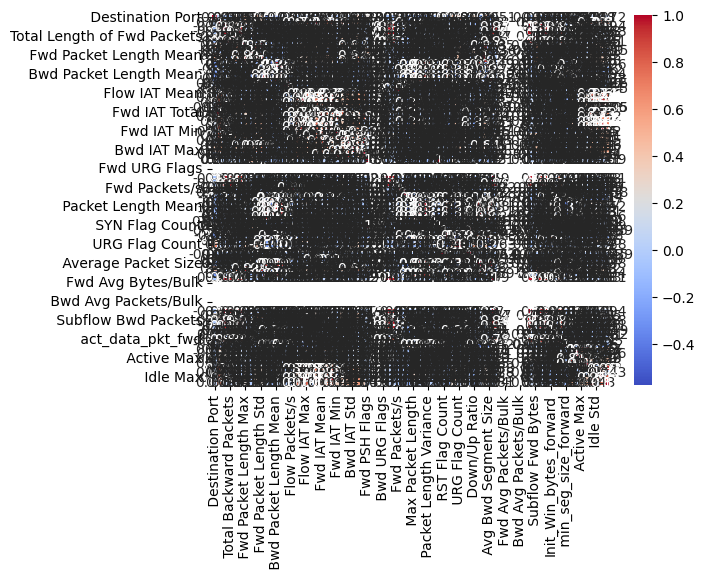

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Heatmap for correlation between features
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [48]:
# Calculate packet_size_ratio if both columns exist
df['packet_size_ratio'] = df[' Total Fwd Packets'] / df[' Total Backward Packets']

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('dataset.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = df.dropna()

poly = PolynomialFeatures(degree=1, include_bias=False)
features = df_clean.drop(columns=' Label')
poly_features = poly.fit_transform(features)

# Print the shapes of the original and polynomial features
print("Original features shape:", features.shape)
print("Polynomial features shape:", poly_features.shape)


Original features shape: (42144, 78)
Polynomial features shape: (42144, 78)


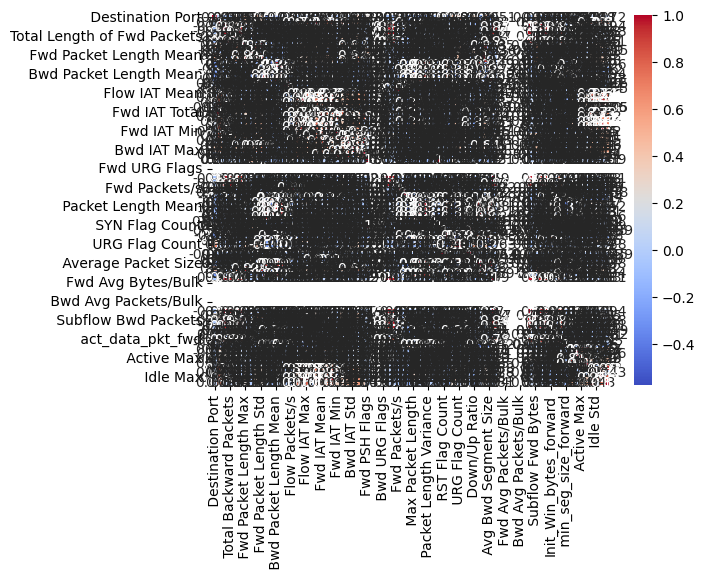

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [11]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(features)
print("Selected features shape:", selected_features.shape)


Selected features shape: (42144, 62)


In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('dataset.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = df.dropna()

# ... (rest of the code from cell 6, if needed) ...

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)

# Instead of using the original df for the target variable, use the target variable from the cleaned dataframe (df_clean)
features = df_clean.drop(columns=' Label')
target_variable = df_clean[' Label'] # Use the target variable from the cleaned dataframe

# Adjust sample size to match if necessary:
min_samples = min(features.shape[0], target_variable.shape[0])
features = features.iloc[:min_samples]
target_variable = target_variable.iloc[:min_samples]

rfe.fit(features, target_variable)

print("Selected features (RFE):", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features (RFE): [False False False False  True False  True False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False]
Feature ranking: [25 29 12 17  1 18  1 47  4 28  5 40  8  1 34 32 39 26 33 38 22 31  6 24
 30 41 45 55 52 44 62 68 73 66  9 11 36 10 35 23 27 13 20 56 61 65 53 49
 51 74 72 46  1  2  7 16 71 64 70 63 69 67 19  1 14 15 21 37  3 43 60 58
 57 59 50 54 42 48]


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold # Import VarianceThreshold

# Define the selector here as well
selector = VarianceThreshold(threshold=0.1) # Define selector within this cell

selected_features = selector.fit_transform(features)

# Change ' Labels' to ' Label' to match the actual column name
X_train, X_test, y_train, y_test = train_test_split(selected_features, df_clean[' Label'],
                                                    test_size=100, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"IDS Accuracy : {accuracy:.4f}")

IDS Accuracy : 1.0000


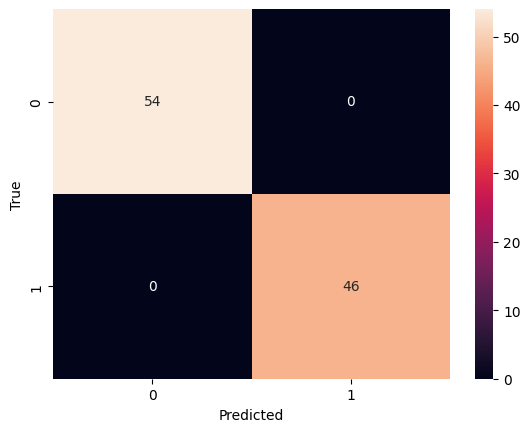

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()